# CSE1904 Capstone Project 

### Author: ASHWANI PRASAD
### Register No.: 19BCE1873
### Guide: KARMEL A

## Project Title: Detection of DoS Attacks in Wireless Sensor Networks using Evolutionary Algorithms and Machine Learning

In [2]:
# Importing Python libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from deap import creator, base, tools, algorithms

#### MODULE 1: Data Pre-processing 

In [27]:
# Loading the dataset and viewing it
wsn_ds = pd.read_csv('WSN-DS.csv')
wsn_ds

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,Normal
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,Normal
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,Normal
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,Normal


In [28]:
# Basic information of the dataset
wsn_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               374661 non-null  int64  
 1   Time             374661 non-null  int64  
 2   Is_CH            374661 non-null  int64  
 3   who CH           374661 non-null  int64  
 4   Dist_To_CH       374661 non-null  float64
 5   ADV_S            374661 non-null  int64  
 6   ADV_R            374661 non-null  int64  
 7   JOIN_S           374661 non-null  int64  
 8   JOIN_R           374661 non-null  int64  
 9   SCH_S            374661 non-null  int64  
 10  SCH_R            374661 non-null  int64  
 11  Rank             374661 non-null  int64  
 12  DATA_S           374661 non-null  int64  
 13  DATA_R           374661 non-null  int64  
 14  Data_Sent_To_BS  374661 non-null  int64  
 15  dist_CH_To_BS    374661 non-null  float64
 16  send_code        374661 non-null  int6

In [29]:
# describe() function gives the basic numerical infomation about the data for each numeric feature..
wsn_ds.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [30]:
# Data points count value for each class labels..
wsn_ds['Attack type'].value_counts()

Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: Attack type, dtype: int64

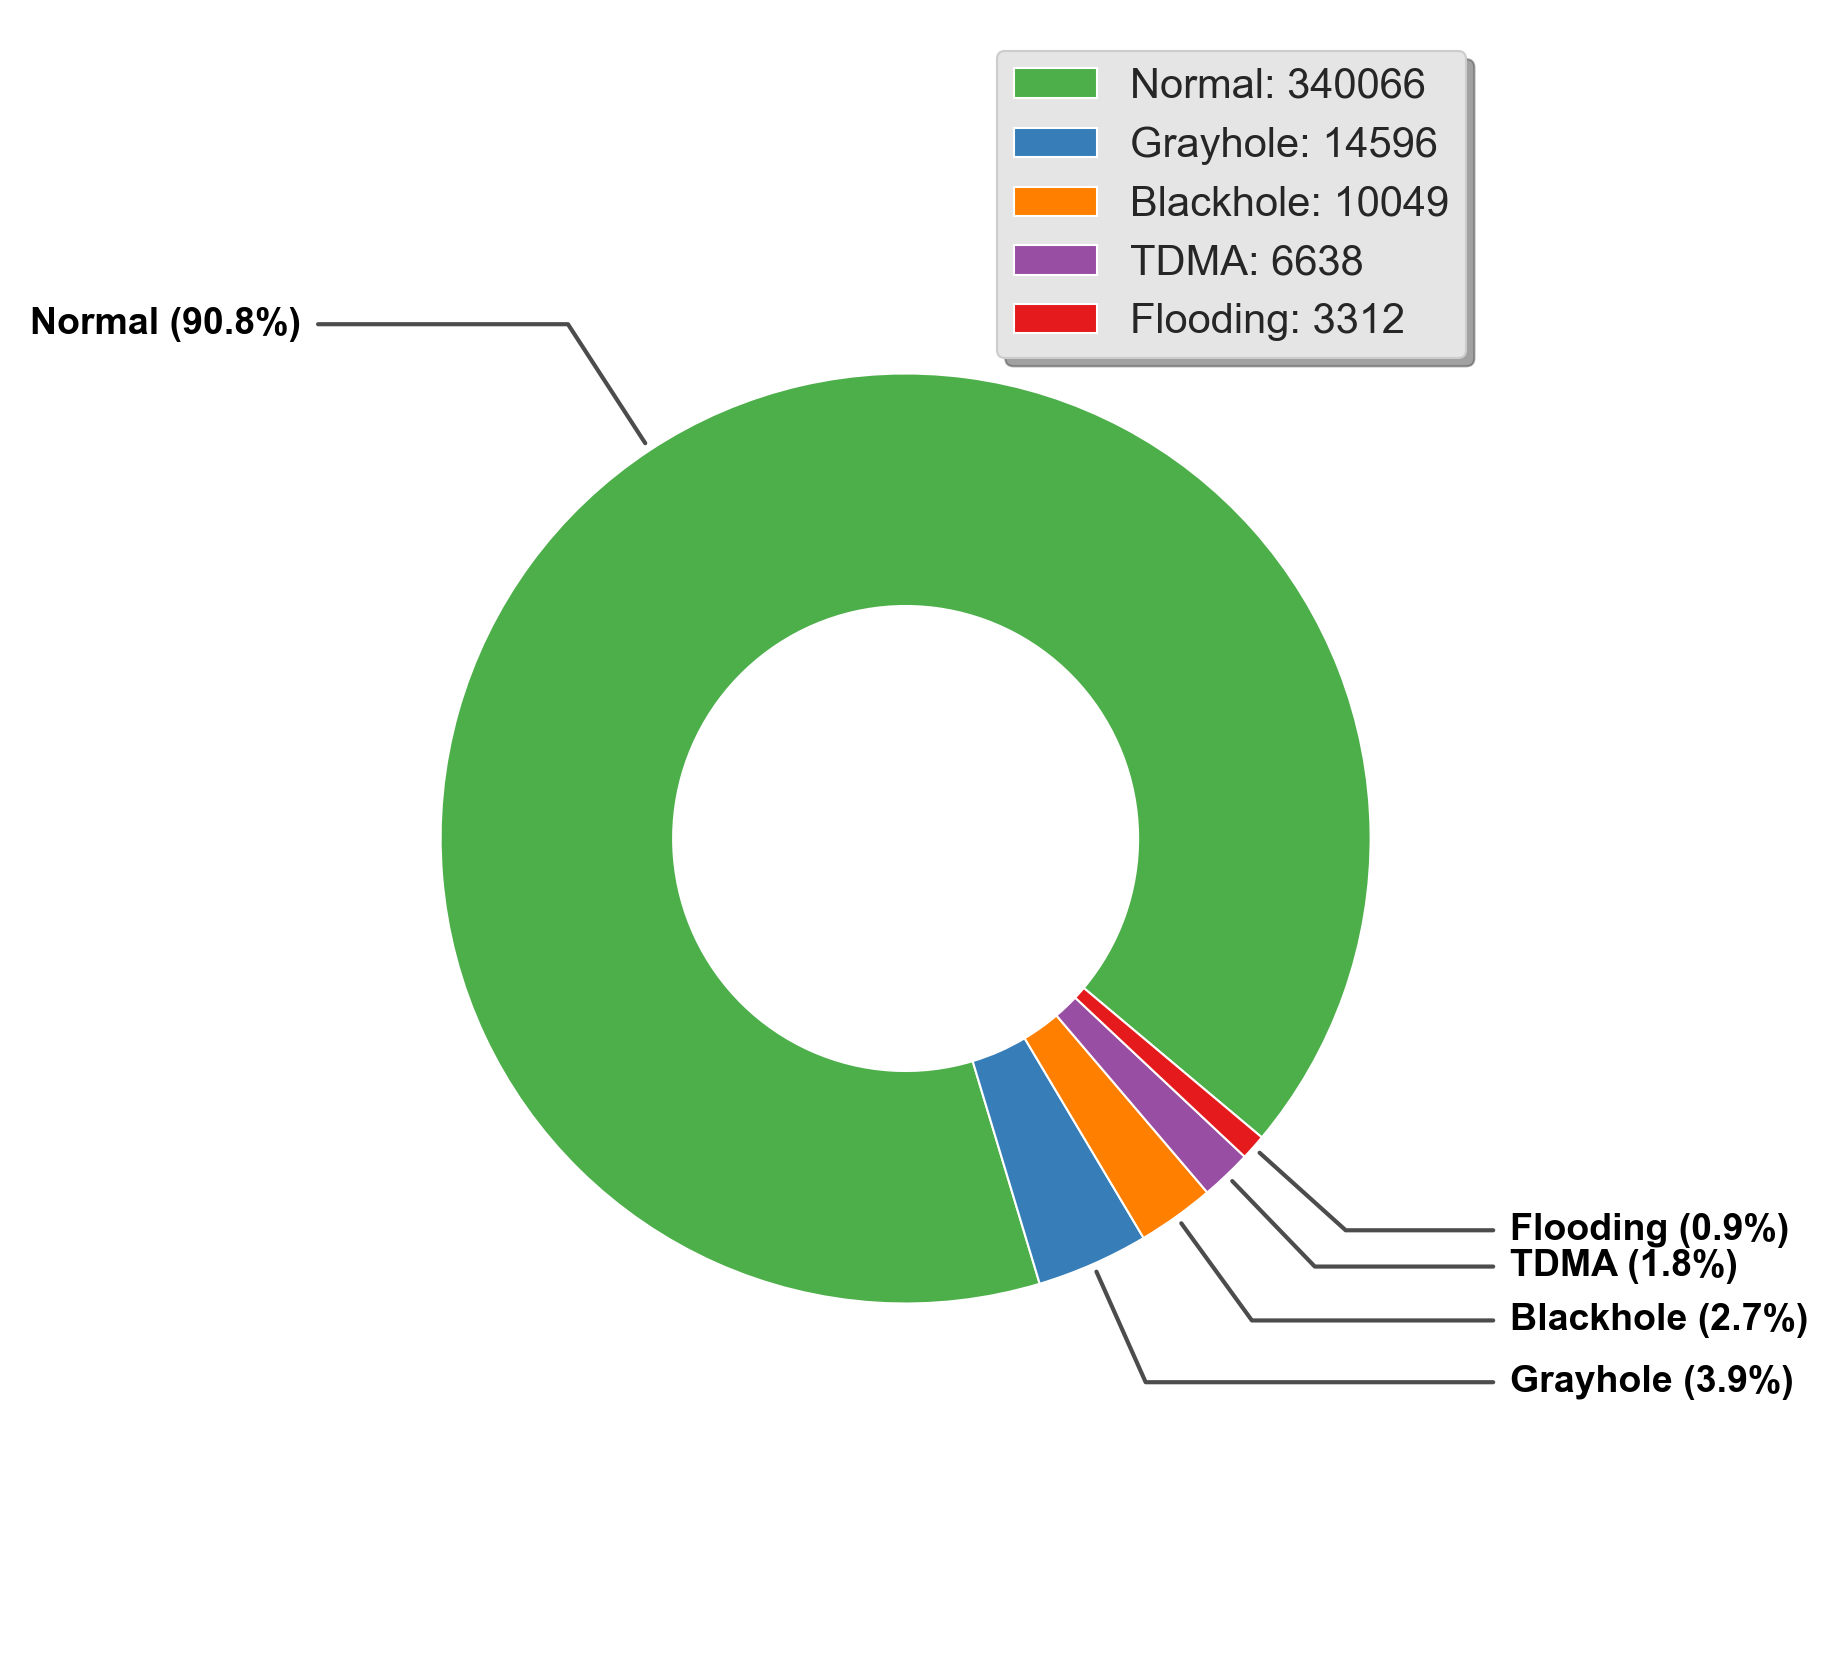

In [139]:
# Visualizing the WSN-DS Attack type distrubution through a donut chart

# Define data and labels
data = [340066, 14596, 10049, 6638, 3312]
labels = ['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']

# Calculate percentages
total = sum(data)
percentages = [(d / total) * 100 for d in data]

# Set up the figure
fig, ax = plt.subplots(figsize=(5, 7))
ax.axis('equal')

# Define the colors
colors = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3', '#e41a1c']

# Define the wedge properties
wedgeprops = {'width': 0.5, 'edgecolor': 'w'}

# Create the pie chart
wedges, _ = ax.pie(data, wedgeprops=wedgeprops, startangle=-40, colors=colors)

# Set up the annotation parameters
annotation_params = {'arrowprops': {'arrowstyle': '-', 'lw': 1, 'alpha': 0.7, 'color': 'black'},
                     'fontsize': 9, 'fontweight': 'bold', 'color': 'k'}

# Add the labels with annotations
for i, (wedge, label, percentage) in enumerate(zip(wedges, labels, percentages)):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
    connectionstyle = f'angle,angleA=0,angleB={angle:.0f}'
    annotation_params['arrowprops'].update({'connectionstyle': connectionstyle})
    ax.annotate(f'{label} ({percentage:.1f}%)', xy=(x, y), xytext=(1.3*np.sign(x), 1.3*y), 
                horizontalalignment=horizontalalignment, **annotation_params)
    
# Add a legend
legend_labels = [f"{label}: {data_value}" for label, data_value in zip(labels, data)]
ax.legend(wedges, legend_labels, loc='best', shadow=True, fancybox=True)

# Show the plot
plt.show()


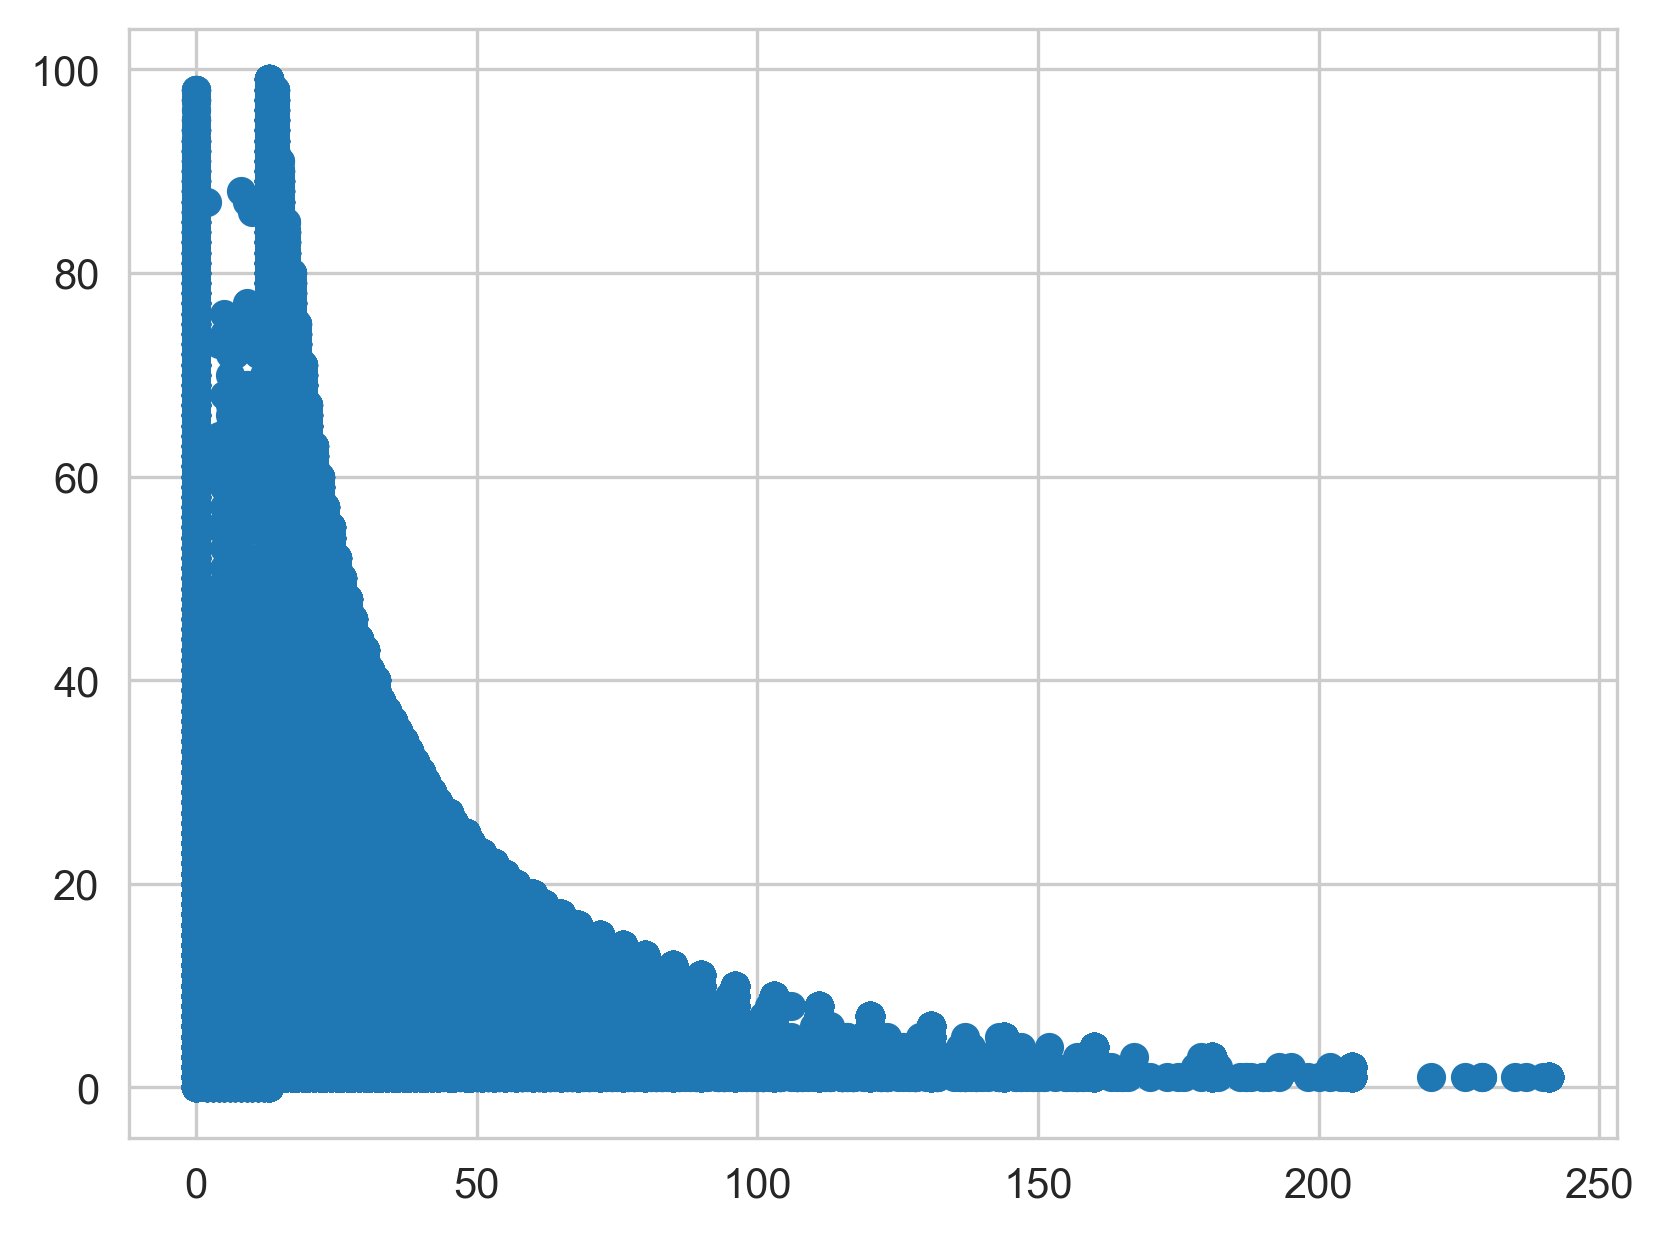

In [67]:
#Visualizing WSN dataset 

#Visualizing the dataset features to find pattern to solve our task
plt.scatter(wsn_ds['DATA_S'], wsn_ds['Rank'])
plt.show()

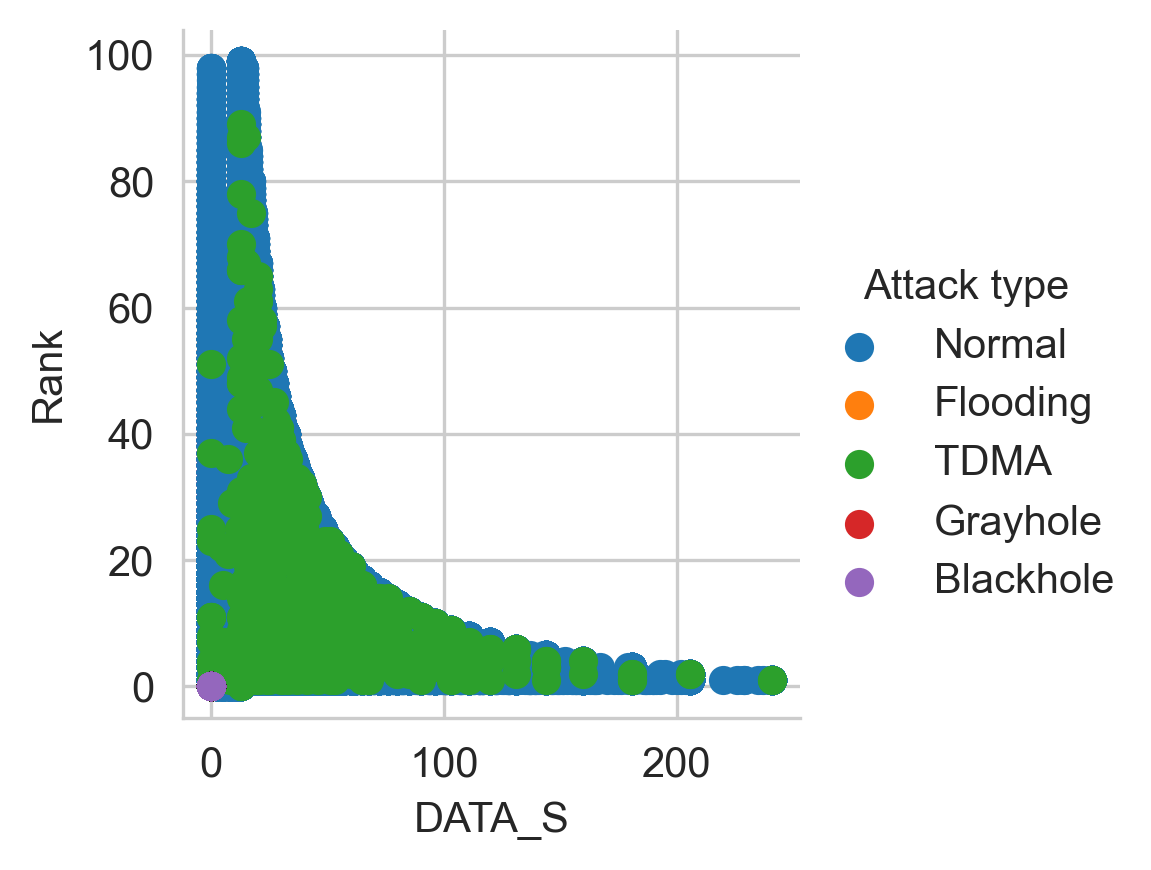

In [68]:
# Using Seaborn library to visualize 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(wsn_ds, hue = 'Attack type')\
    .map(plt.scatter, 'DATA_S', 'Rank') \
    .add_legend()

plt.show()

In [33]:
# Dropping the column named 'id' as it does not play any role in attack classification
wsn_ds = wsn_ds.drop('id', axis=1)

In [39]:
# Shape of the updated dataset
wsn_ds.shape

(374661, 18)

In [34]:
# Variables are categorized into input/independent variables and a target/output variable.

# Input variables (X)
X = wsn_ds[['Time', 'Is_CH', 'who CH', 'Dist_To_CH', 'ADV_S', 'ADV_R', 'JOIN_S', 'JOIN_R', 'SCH_S', 'SCH_R', 'Rank','send_code', 
           'DATA_S','DATA_R', 'Data_Sent_To_BS', 'dist_CH_To_BS', 'Expaned Energy']]

# Target variable (y)
y = wsn_ds['Attack type']

In [35]:
# Selecting 10 out of 17 features from the WSN-DS using Principal Component Analysis (PCA) and Mutual Information

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=17)
X_pca = pca.fit_transform(X)

# Apply mutual information to select the top 10 features
k = 10
mi = SelectKBest(mutual_info_classif, k=k)
X_mi = mi.fit_transform(X_pca, y)

# Get the indices of the selected features
selected_features_idx = mi.get_support(indices=True)

# Print the names of the selected features
selected_features_names = X.columns[selected_features_idx]
print(selected_features_names)


Index(['Time', 'Is_CH', 'who CH', 'Dist_To_CH', 'ADV_S', 'SCH_S', 'SCH_R',
       'send_code', 'DATA_S', 'dist_CH_To_BS'],
      dtype='object')


In [36]:
# Subset of input variables (X_1) obtained as an output from the previous cell

X_1 = wsn_ds[['Time', 'Is_CH', 'who CH', 'Dist_To_CH', 'ADV_S', 'SCH_S', 'SCH_R',
       'send_code', 'DATA_S', 'dist_CH_To_BS']]


In [37]:
# Define the number of features to select for dimensionality reduction by Evolutionary Algorithms

# To reduce the overhead on WSNs, only 4 features would be considered
num_features = 4

In [38]:
# Split the dataset into training and test sets

# Ratio of dataset split: 70% for training and remaining 30% for testing purposes

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=0)

#### MODULE 2: Dimensionality Reduction Using Evolutionary Algorithms

In [40]:
# Define the GOA function
def goa(X_train, y_train, num_features):
    best_subset = None
    best_accuracy = 0
    for i in range(100):
        subset = np.random.choice(X_train.shape[1], num_features, replace=False)
        X_subset = X_train.iloc[:, subset]
        clf = DecisionTreeClassifier()
        clf.fit(X_subset, y_train)
        y_pred = clf.predict(X_subset)
        accuracy = accuracy_score(y_train, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_subset = subset
    return best_subset

In [41]:
best_subset = goa(X_train, y_train, num_features)

In [42]:
print("Best subset of features: ", best_subset)

Best subset of features:  [2 0 9 5]


In [43]:
column_names = list(wsn_ds.columns)
best_subset_columns = [column_names[i] for i in best_subset]
print("Best subset of features: ", best_subset_columns)

Best subset of features:  ['who CH', 'Time', 'SCH_R', 'ADV_R']


#### MODULE 3: Training of Machine Learning Classifiers

#### MODULE 4: Recognition of Attack on Test Data and Unseen Data

#### MODULE 5: Analysis of DoS Attack Types

#### MODULE 6: Model Validation and Comparison

In [14]:
# Train the classifier on the best subset of features
X_train_subset = X_train.iloc[:, best_subset]
clf = DecisionTreeClassifier()
clf.fit(X_train_subset, y_train)

DecisionTreeClassifier()

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_subset, y_train, cv=5)

In [17]:
# Print the evaluation scores
print('Cross validation scores:', scores)

Cross validation scores: [0.99431155 0.99511227 0.99512895 0.99531237 0.99442823]


In [18]:
# Evaluate the performance of the classifier on the test set
X_test_subset = X_test.iloc[:, best_subset]
y_pred = clf.predict(X_test_subset)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9952223986761507
